In [1]:
import pandas as pd
import glob

import colorlover as cl

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly
plotly.tools.set_credentials_file(username='iverson3', api_key='gE3StFoPy53qjW3ReF68')

## Data processing

In [2]:
files = glob.glob("*.fancyvj.wt.txt")

In [3]:
# read metadata
meta = pd.read_csv("metadata.txt", sep="\t", index_col=0)
meta.head() 

,sample_id,donor,condition,subset,..filter..
file_name,,,,,
026.txt,26,GS1168,Bulk,TEM,conv:MiXcr
003.txt,3,GS1180,Bulk,TEMRA,conv:MiXcr
002.txt,2,GS1180,Bulk,TEM,conv:MiXcr
015.txt,15,GS1149,MHCI_IFNgamma_pos,TEM,conv:MiXcr
081.txt,81,GS1188,MHCI_IFNgamma_pos,TEMRA,conv:MiXcr


In [4]:
def get_v_freq (file):
    df = pd.read_csv(file, sep="\t", index_col=0)
    v_sums = df.sum(axis=0)
    
    return v_sums

In [5]:
donor_vs = {}

for file in files:
    file_name = file.split(".")[0] + ".txt"
    donor = meta.loc[file_name, "donor"]
    condition = meta.loc[file_name, "condition"]
    subset = meta.loc[file_name, "subset"]
    sample_name = "_".join([condition, subset])
    v_freq = get_v_freq(file)
    v_freq = v_freq.to_frame(name=sample_name)
    
    if donor in donor_vs:
        donor_vs[donor] = pd.concat([donor_vs[donor], v_freq], axis=1, sort=False)
    else:
        donor_vs[donor] = v_freq

In [6]:
def sort_v_name(v):
    v = v[4:].split("-")
    if len(v) == 1:
        return (int(v[0]), 0)
    else:
        return (int(v[0]), int(v[1]))
    
for k, v in donor_vs.items():
    # rearrange columns
    v = v[["Bulk_TEM", "MHCI_IFNgamma_pos_TEM", "Bulk_TEMRA", "MHCI_IFNgamma_pos_TEMRA"]]
    
    # rename
    v.rename(columns={
        "Bulk_TEM": "Unstimulated Tem",
        "MHCI_IFNgamma_pos_TEM": "DENV Tem",
        "Bulk_TEMRA": "Unstimulated Temra",
        "MHCI_IFNgamma_pos_TEMRA": "DENV Temra"
    }, inplace=True)
    
    indices = v.index.values.tolist()
    indices = sorted(indices, key=sort_v_name)
    v = v.reindex(indices)

    # replace nan with 0
    v.fillna(0, inplace=True)
    
    # scale to 100%
    v = v * 100
    
    # update
    donor_vs[k] = v

In [7]:
# all v segments
all_v = set()

for v in donor_vs.values():
    vs = set(v.index.values.tolist())
    all_v |= vs

all_v = list(all_v)
print(len(all_v))

47


In [8]:
# 50 colors
paired = cl.scales['11']['qual']['Set3']
paired50 = cl.interp(paired, 50)

# each v segment gets a unique color
v_colors = {all_v[i]:paired50[i] for i in range(len(all_v))}

In [9]:
import plotly.plotly as py
import plotly.graph_objs as go

In [10]:
def plot_stacked_bar(k):
    data = []
    
    v = donor_vs[k]
    for index in v.index.values:
        trace = go.Bar(
            x=v.columns,
            y=v.loc[index],
            name=index,
            marker=dict(color=v_colors[index]),
        )
        data.append(trace)

    layout = go.Layout(
        title=k,
        barmode='stack',
        legend=dict(traceorder='normal'),
    )
    
    return (data, layout)

## Plot the usage of V segments for each population in each individual donor. Please note that each V segment is represented by the same color in all the plots.

In [11]:
data, layout = plot_stacked_bar("GS1149")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="GS1149_bar")

In [12]:
data, layout = plot_stacked_bar("GS1168")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="GS1168_bar")

In [13]:
data, layout = plot_stacked_bar("GS1169")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="GS1169_bar")

In [14]:
data, layout = plot_stacked_bar("GS1178")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="GS1178_bar")

In [15]:
data, layout = plot_stacked_bar("GS1180")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="GS1180_bar")

In [16]:
data, layout = plot_stacked_bar("GS1188")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="GS1188_bar")

### Visualize the data using heatmaps

In [17]:
def plot_heatmap(k):
    v = donor_vs[k]
    cols = v.columns.tolist()
    cols.reverse()
    trace = go.Heatmap(z=v[cols].transpose().values,
                       x=v.index.values.tolist(),
                       y=cols,
                       name=k)
    data=[trace]
    
    layout = go.Layout(
        title=k,
        margin=go.Margin(
            l=150,
        )
    )
    
    return (data, layout)

In [18]:
data, layout = plot_heatmap("GS1149")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='GS1149_heatmap')

In [19]:
data, layout = plot_heatmap("GS1168")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='GS1168_heatmap')

In [20]:
data, layout = plot_heatmap("GS1169")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='GS1169_heatmap')

In [21]:
data, layout = plot_heatmap("GS1178")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='GS1178_heatmap')

In [22]:
data, layout = plot_heatmap("GS1180")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='GS1180_heatmap')

In [23]:
data, layout = plot_heatmap("GS1188")
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='GS1188_heatmap')

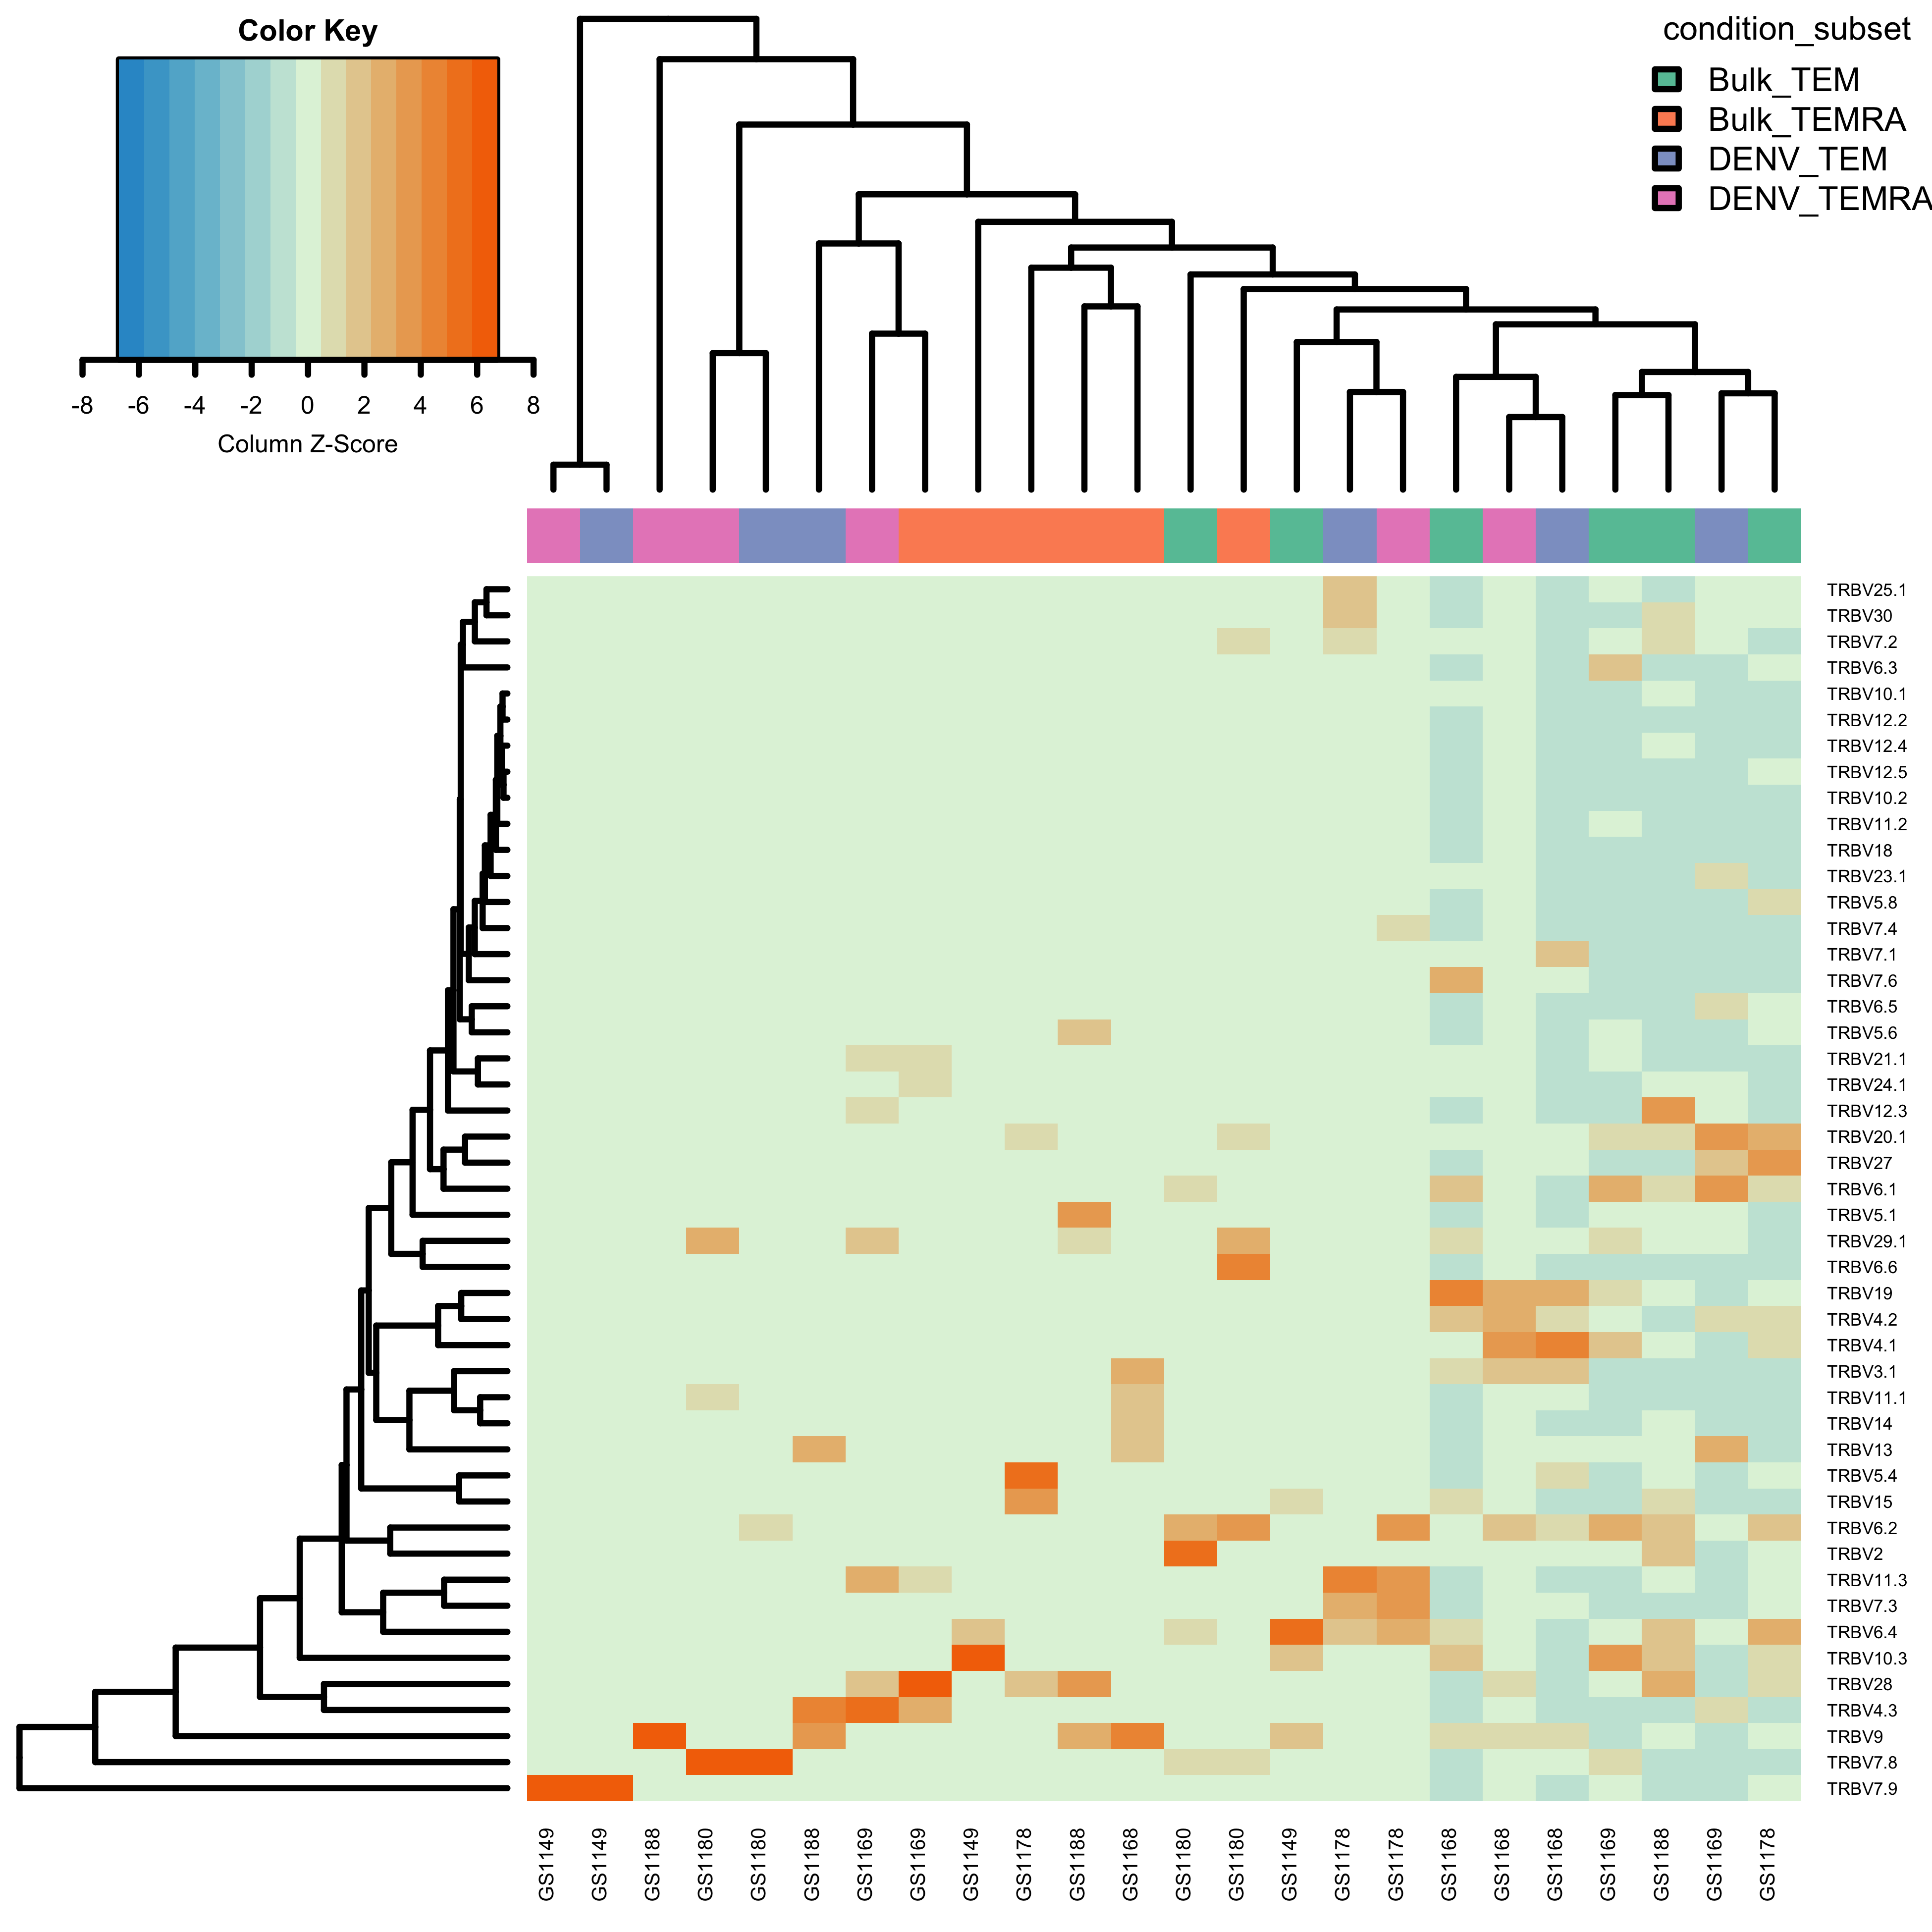

In [33]:
# plot all samples together in a single heatmap
from IPython.display import Image
Image("v_segments_heatmap.png")